In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Create an SVM model
svm_model = SVC(kernel='linear')

# Flatten the training images
x_train_flatten = x_train.reshape(x_train.shape[0], -1)

# Train the SVM model
svm_model.fit(x_train_flatten, y_train)

# Evaluate the CNN model
cnn_predictions = model.predict(x_test)
cnn_predictions_multiclass = cnn_predictions.argmax(axis=1)

cnn_test_accuracy = accuracy_score(y_test, cnn_predictions_multiclass)
cnn_precision = precision_score(y_test, cnn_predictions_multiclass, average='macro')
cnn_recall = recall_score(y_test, cnn_predictions_multiclass, average='macro')
cnn_f1 = f1_score(y_test, cnn_predictions_multiclass, average='macro')

# Flatten the testing images
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Evaluate the SVM model
svm_predictions = svm_model.predict(x_test_flatten)
svm_test_accuracy = accuracy_score(y_test, svm_predictions)

print('CNN test accuracy:', cnn_test_accuracy)
print('CNN precision:', cnn_precision)
print('CNN recall:', cnn_recall)
print('CNN F1-score:', cnn_f1)
print('SVM test accuracy:', svm_test_accuracy)


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1250/1250 [==============================] - 63s 49ms/step - loss: 1.5841 - accuracy: 0.4194 - val_loss: 1.3695 - val_accuracy: 0.5124
Epoch 2/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.2267 - accuracy: 0.5595 - val_loss: 1.1712 - val_accuracy: 0.5820
Epoch 3/10
1250/1250 [==============================] - 58s 46ms/step - loss: 1.0714 - accuracy: 0.6220 - val_loss: 1.0546 - val_accuracy: 0.6296
Epoch 4/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9698 - accuracy: 0.6592 - val_loss: 1.0263 - val_accuracy: 0.6405
Epoch 5/10
1250/1250 [==============================] - 58s 47ms/step - loss: 0.8933 - accuracy: 0.6878 - val_loss: 0.9515 - val_accuracy: 0.6650
Epoch 6/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.8341 - accuracy: 0.7093 - val_loss: 0.9369 - val_accuracy: 0.6746
Epoch 7/10
1250/1250 [==============================] - 5

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluate the SVM model
svm_predictions = svm_model.predict(x_test_flatten)
svm_test_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='macro')
svm_recall = recall_score(y_test, svm_predictions, average='macro')
svm_f1 = f1_score(y_test, svm_predictions, average='macro')


print('SVM test accuracy:', svm_test_accuracy)
print('SVM precision:', svm_precision)
print('SVM recall:', svm_recall)
print('SVM F1-score:', svm_f1)

NameError: ignored

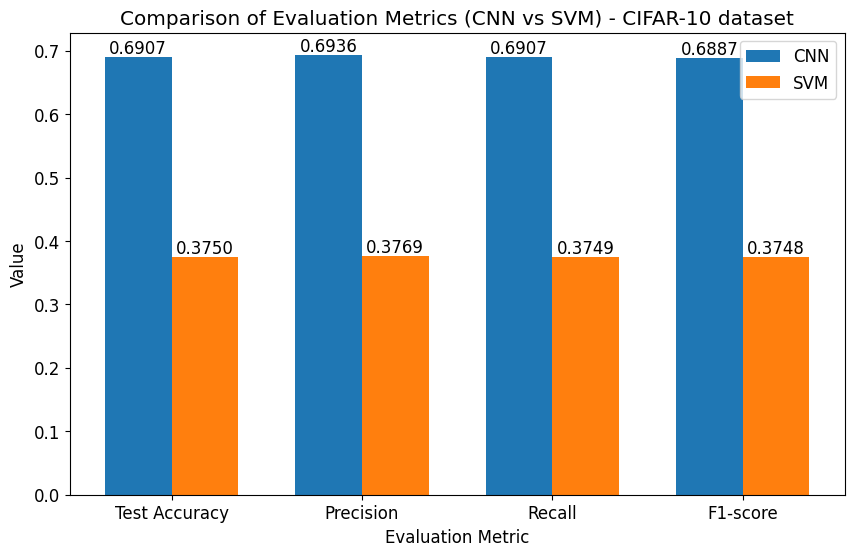

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metrics for the CNN model
cnn_test_accuracy = 0.6907
cnn_precision = 0.6936
cnn_recall = 0.6907
cnn_f1 = 0.6887

# Evaluation metrics for the SVM model
svm_test_accuracy = 0.375
svm_precision = 0.3769
svm_recall = 0.3749
svm_f1 = 0.3748

# Metric names
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-score']

# CNN metrics values
cnn_metrics = [cnn_test_accuracy, cnn_precision, cnn_recall, cnn_f1]

# SVM metrics values
svm_metrics = [svm_test_accuracy, svm_precision, svm_recall, svm_f1]

# Set the figure size and font size
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 12})

# Set the position of the bars on the x-axis
x = np.arange(len(metrics))

# Width of the bars
width = 0.35

# Plot the CNN bars
plt.bar(x - width/2, cnn_metrics, width, label='CNN')

# Plot the SVM bars
plt.bar(x + width/2, svm_metrics, width, label='SVM')

# Add data labels on the bars
for i in range(len(metrics)):
    plt.text(x[i] - width/2, cnn_metrics[i] + 0.005, f"{cnn_metrics[i]:.4f}", ha='center')
    plt.text(x[i] + width/2, svm_metrics[i] + 0.005, f"{svm_metrics[i]:.4f}", ha='center')

# Add labels, title, and legend
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Comparison of Evaluation Metrics (CNN vs SVM) - CIFAR-10 dataset')
plt.xticks(x, metrics)
plt.legend()

# Display the chart
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the CNN model
cnn_confusion = confusion_matrix(y_test, cnn_predictions_multiclass)

# Calculate the confusion matrix for the SVM model
svm_confusion = confusion_matrix(y_test, svm_predictions)

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix for CNN model
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for SVM model
plt.figure(figsize=(10, 8))
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


NameError: ignored